# Day 12

In [1]:
%cd ..

from inspect import cleandoc
from matplotlib import pyplot
import ipytest
ipytest.autoconfig()

/home/vagrant/Development/advent-of-code-2022/python


In [2]:
example = cleandoc("""
    Sabqponm
    abcryxxl
    accszExk
    acctuvwj
    abdefghi
    """)

In [3]:
from string import ascii_lowercase
from itertools import chain

HEIGHTS = dict(chain(zip(ascii_lowercase, range(26)), [("S", 0), ("E", 25)]))

def height_of(c: str) -> int:
    return HEIGHTS[c]

heights = [
    list(map(height_of, line))
    for line in example.splitlines()
]
heights

[[0, 0, 1, 16, 15, 14, 13, 12],
 [0, 1, 2, 17, 24, 23, 23, 11],
 [0, 2, 2, 18, 25, 25, 23, 10],
 [0, 2, 2, 19, 20, 21, 22, 9],
 [0, 1, 3, 4, 5, 6, 7, 8]]

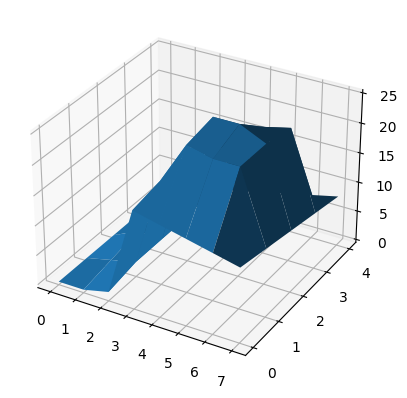

In [4]:
%matplotlib inline
from numpy import array, arange, meshgrid

X, Y = meshgrid(arange(len(heights[0])), arange(len(heights)))

fig = pyplot.figure()
ax = pyplot.axes(projection="3d")

ax.plot_surface(X, Y, array(heights))

In [6]:
from aocd import get_data

data = get_data(year=2022, day=12)

In [130]:
from dataclasses import dataclass
from functools import cached_property
from numpy import array, arange, meshgrid
from igraph import Graph, plot

def node_name(x: int|tuple[int, int], y: int|None = None) -> str:
    if isinstance(x, int):
        return f"{x}-{y}"
    else:
        return f"{x[0]}-{x[1]}"

@dataclass
class Heightmap:
    start: tuple[int, int]
    end: tuple[int, int]
    heights: list[list[int]]
    
    @classmethod
    def parse(cls, text: str):
        l = {
            c: (i, j)
            for j, line in enumerate(text.splitlines())
            for i, c in enumerate(line)
            if c in ["S", "E"]
        }
        heights = [
            list(map(height_of, line))
            for line in text.splitlines()
        ]
        
        return cls(l["S"], l["E"], heights)
    
    @cached_property
    def length(self) -> int:
        return len(self.heights)
    
    @cached_property
    def width(self) -> int:
        return len(self.heights[0])
    
    @cached_property
    def graph(self) -> Graph:
        result = Graph(directed=True)

        node_names = [
            node_name(i, j)
            for j, line in enumerate(self.heights)
            for i, c in enumerate(line)
        ]

        result.add_vertices(len(node_names), attributes={"name": node_names})

        for j, line in enumerate(self.heights):
            for i, c in enumerate(line):
                if i > 0 and self.heights[j][i-1] <= c + 1:
                    result.add_edge(node_name(i, j), node_name(i-1, j))
                if j > 0 and self.heights[j-1][i] <= c + 1:
                    result.add_edge(node_name(i, j), node_name(i, j-1))
                if i < self.width - 1 and self.heights[j][i+1] <= c + 1:
                    result.add_edge(node_name(i, j), node_name(i+1, j))
                if j < self.length - 1 and self.heights[j+1][i] <= c + 1:
                    result.add_edge(node_name(i, j), node_name(i, j+1))
        return result

    def plot(self):
        X, Y = meshgrid(arange(self.width), arange(self.length))

        fig = pyplot.figure()
        ax = pyplot.axes(projection="3d")

        ax.plot_surface(X, Y, array(self.heights))
        
    def plot_graph(self):
        _, ax = pyplot.subplots()
        plot(self.graph, target=ax)
        
    def fewest_steps(self):
        return self.graph.distances(node_name(self.start), node_name(self.end))[0][0]
    
    def fewest_steps_from_low_points(self):
        low_points = [
            node_name(i, j)
            for j, line in enumerate(self.heights)
            for i, height in enumerate(line)
            if height == 0
        ]

        return min(
            d
            for ds in self.graph.distances(low_points, node_name(self.end))
            for d in ds
        )

## Part 1

Heightmap(start=(0, 0), end=(5, 2), heights=[[0, 0, 1, 16, 15, 14, 13, 12], [0, 1, 2, 17, 24, 23, 23, 11], [0, 2, 2, 18, 25, 25, 23, 10], [0, 2, 2, 19, 20, 21, 22, 9], [0, 1, 3, 4, 5, 6, 7, 8]])


31

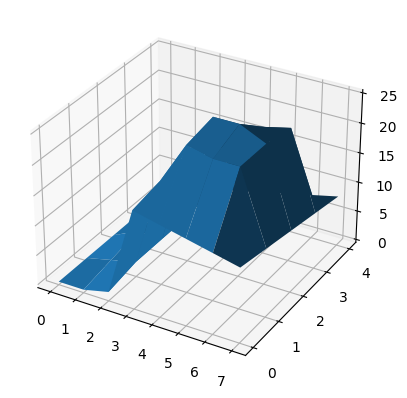

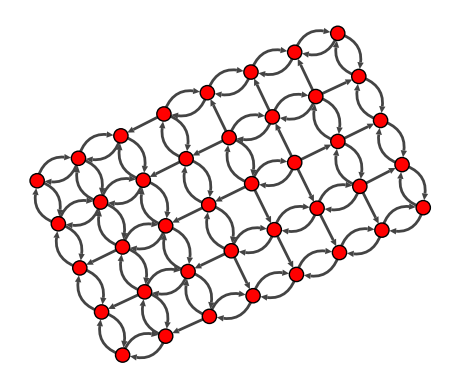

In [131]:
example_heightmap = Heightmap.parse(example)
print(example_heightmap)
example_heightmap.plot()
example_heightmap.plot_graph()

example_heightmap.fewest_steps()

391

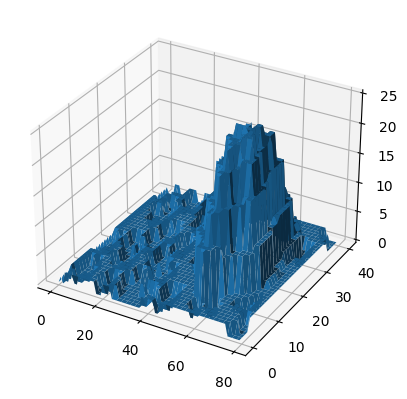

In [127]:
data_heightmap = Heightmap.parse(data)
data_heightmap.plot()
data_heightmap.fewest_steps()

## Part 2

In [125]:
example_heightmap.fewest_steps_from_low_points()

29

In [126]:
data_heightmap.fewest_steps_from_low_points()

386